Recommendations based on Recent activities for items (clicked, watched, purchased, liked, rated, etc.).
Recent search history
Recently liked
Recently rated
Timestamp of activity

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

df = pd.read_csv('recent_activity.csv')
df_data = pd.read_csv('dataset.csv')
df.head(10)


,User_Id,Meal_Id,Rated,Liked,Searched,Purchased,Timestamp
0,53,meal_id2,0,0,1,0,2020-03-01 12:03:24
1,50,meal_id3,0,0,1,1,2020-03-02 06:08:30
2,27,meal_id6,0,0,1,0,2020-03-02 16:11:20
3,26,meal_id9,0,0,1,1,2020-03-04 02:20:58
4,40,meal_id10,0,1,0,1,2020-03-05 00:27:12
5,93,meal_id11,1,0,0,1,2020-03-06 08:36:16
6,77,meal_id12,0,1,0,0,2020-03-07 04:41:56
7,15,meal_id16,0,0,1,0,2020-03-07 12:44:12
8,86,meal_id17,0,1,0,1,2020-03-10 13:04:36
9,58,meal_id20,1,0,0,0,2020-03-13 13:25:00


Finding similar items on the basis of recent activity
1.Finding the most popular items in recent activity
2.Selecting the features that occour more than mean occurance of features
3.Recommending on those features

In [2]:
meal_ids = list(df.Meal_Id.unique())
recent_data = df_data[df_data.Meal_Id.isin(meal_ids)][['Nutrient','catagory','Disease','Diet']].reset_index(drop=True)


Nutrient
iron             15
carbohydrates     5
vitamin_a         4
fiber             3
magnesium         2
vitamin_d         2
phosphorus        2
manganese         1
selenium          1
vitamin_c         1
potassium         1
Name: count, dtype: int64


(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35')])

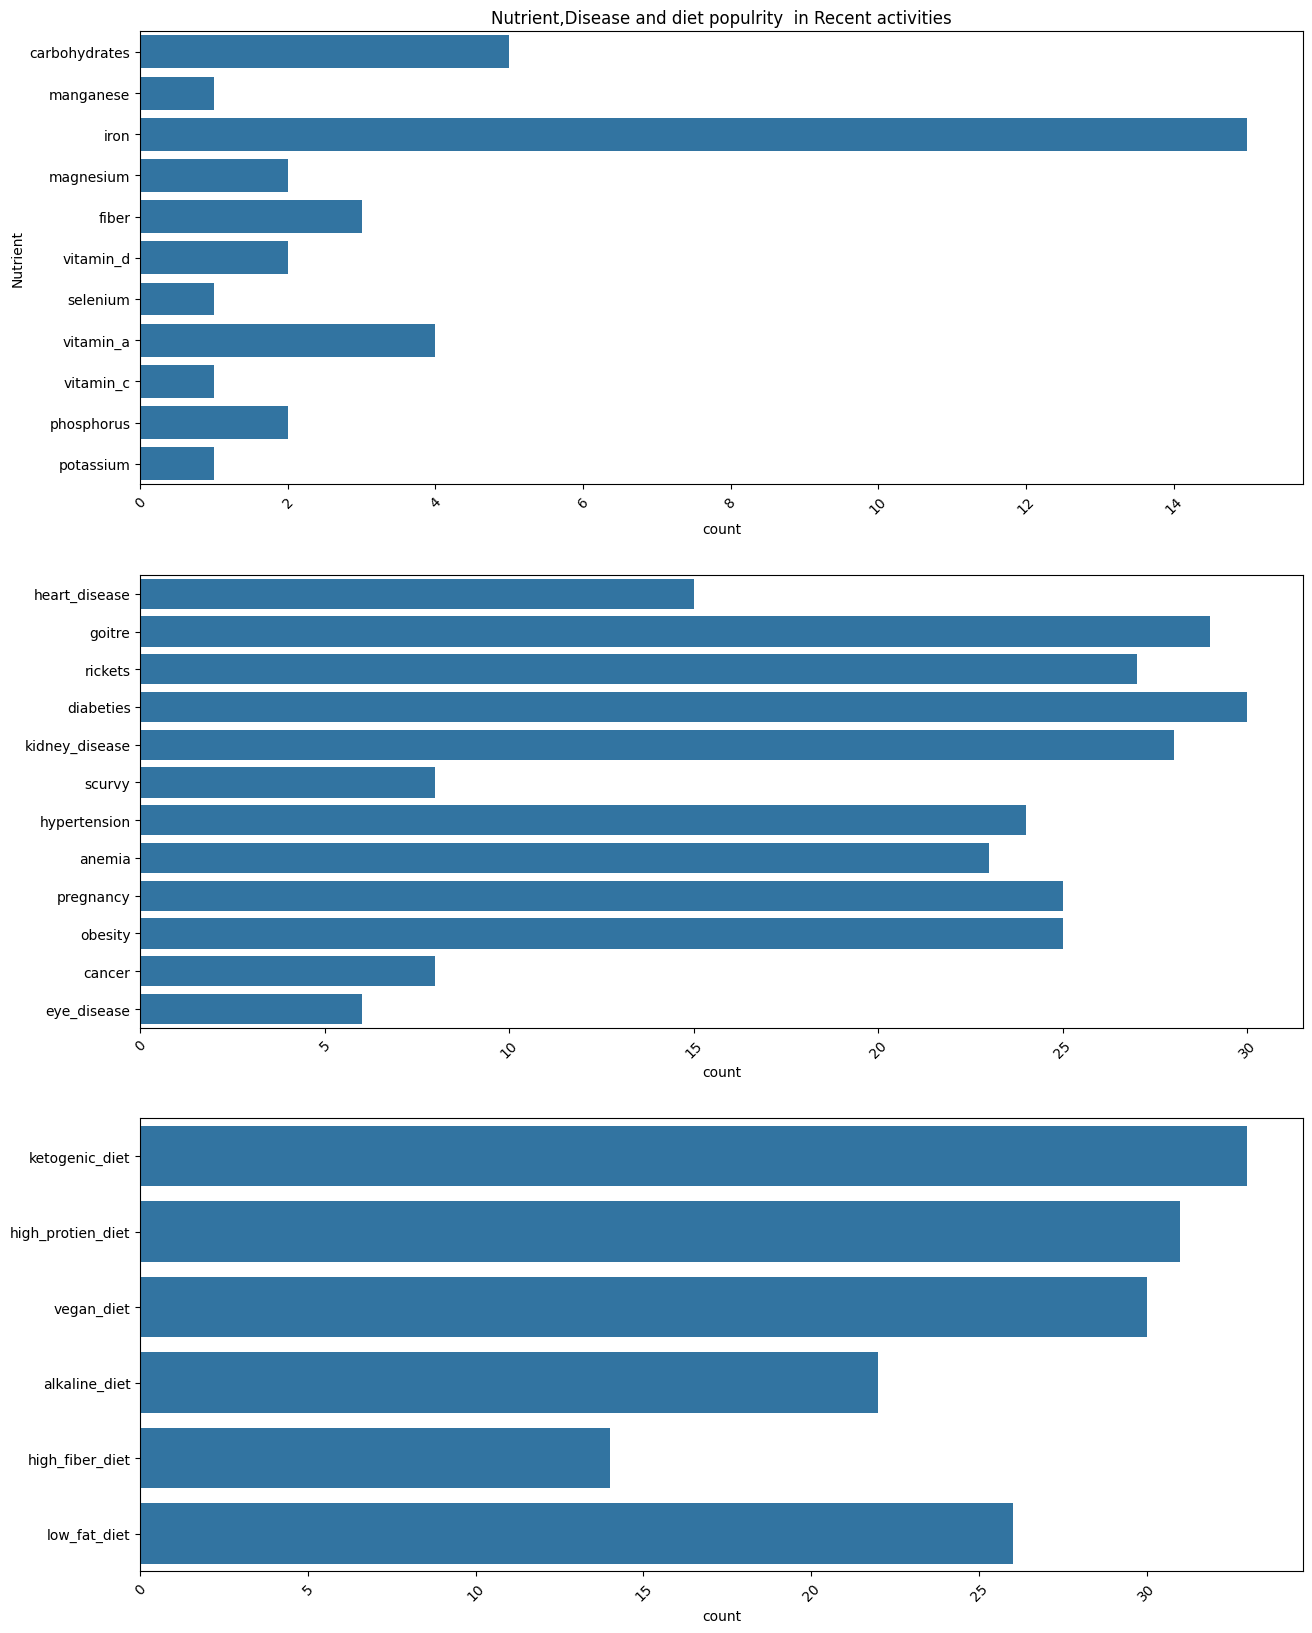

In [3]:
plt.figure(figsize=(15,20))
plt.subplot(3,1,1)
plt.xticks(rotation=45)
plt.title('Nutrient,Disease and diet populrity  in Recent activities')
print(recent_data.Nutrient.value_counts())

sns.countplot(recent_data.Nutrient)
disease = []
for i in range(recent_data.shape[0]):
    for j in recent_data.loc[i,'Disease'].split():
        disease.append(j)

plt.subplot(3,1,2)    
sns.countplot(disease)
plt.xticks(rotation=45)

diet = []
for i in range(recent_data.shape[0]):
    for j in recent_data.loc[i,'Diet'].split():
        diet.append(j)

plt.subplot(3,1,3)    
sns.countplot(diet)
plt.xticks(rotation=45)

Feature selection

In [4]:
#FINDS THE ITEMS THAT ARE MORE THAN MEAN VALUE IN NUTRIENTS
value_counts = recent_data.Nutrient.value_counts()
m = recent_data.Nutrient.value_counts().mean()
print('mean occurance',m)
features = list(value_counts[recent_data.Nutrient.value_counts()>m].index)
value_counts[recent_data.Nutrient.value_counts()>m]

mean occurance 3.3636363636363638


Nutrient
iron             15
carbohydrates     5
vitamin_a         4
Name: count, dtype: int64

In [8]:
a = dict(Counter(disease))
m = np.mean(list(a.values()))
print('mean occurance',m)
for i in a.items():
    if i[1]>m:
        features.append(i[0])
print(features)

mean occurance 20.666666666666668
['iron', 'carbohydrates', 'vitamin_a', 'goitre', 'rickets', 'diabeties', 'kidney_disease', 'hypertension', 'anemia', 'pregnancy', 'obesity', 'goitre', 'rickets', 'diabeties', 'kidney_disease', 'hypertension', 'anemia', 'pregnancy', 'obesity', 'goitre', 'rickets', 'diabeties', 'kidney_disease', 'hypertension', 'anemia', 'pregnancy', 'obesity', 'goitre', 'rickets', 'diabeties', 'kidney_disease', 'hypertension', 'anemia', 'pregnancy', 'obesity']


In [10]:
a = dict(Counter(diet))
m = np.mean(list(a.values()))
print('mean occurance',m)
for i in a.items():
    if i[1]>m:
        features.append(i[0])
#Final Features to recommend with
print(features)

mean occurance 26.0
['iron', 'carbohydrates', 'vitamin_a', 'goitre', 'rickets', 'diabeties', 'kidney_disease', 'hypertension', 'anemia', 'pregnancy', 'obesity', 'goitre', 'rickets', 'diabeties', 'kidney_disease', 'hypertension', 'anemia', 'pregnancy', 'obesity', 'goitre', 'rickets', 'diabeties', 'kidney_disease', 'hypertension', 'anemia', 'pregnancy', 'obesity', 'goitre', 'rickets', 'diabeties', 'kidney_disease', 'hypertension', 'anemia', 'pregnancy', 'obesity', 'ketogenic_diet', 'high_protien_diet', 'vegan_diet', 'ketogenic_diet', 'high_protien_diet', 'vegan_diet']
